In [8]:
%matplotlib inline

In [9]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
Description : Titanic
"""

# Use only the provided packages!
import math
import csv
from util import *
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

######################################################################
# classes
######################################################################

class Classifier(object) :
    """
    Classifier interface.
    """
    
    def fit(self, X, y):
        raise NotImplementedError()
        
    def predict(self, X):
        raise NotImplementedError()


class MajorityVoteClassifier(Classifier) :
    
    def __init__(self) :
        """
        A classifier that always predicts the majority class.
        
        Attributes
        --------------------
            prediction_ -- majority class
        """
        self.prediction_ = None
    
    def fit(self, X, y) :
        """
        Build a majority vote classifier from the training set (X, y).
        
        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes
        
        Returns
        --------------------
            self -- an instance of self
        """
        majority_val = Counter(y).most_common(1)[0][0]
        self.prediction_ = majority_val
        return self
    
    def predict(self, X) :
        """
        Predict class values.
        
        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
        
        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.prediction_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")
        
        n,d = X.shape
        y = [self.prediction_] * n 
        return y


class RandomClassifier(Classifier) :
    
    def __init__(self) :
        """
        A classifier that predicts according to the distribution of the classes.
        
        Attributes
        --------------------
            probabilities_ -- class distribution dict (key = class, val = probability of class)
        """
        self.probabilities_ = None
    
    def fit(self, X, y) :
        """
        Build a random classifier from the training set (X, y).
        
        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes
        
        Returns
        --------------------
            self -- an instance of self
        """
        
        ### ========== TODO : START ========== ###
        # part b: set self.probabilities_ according to the training set
        unique, counts = np.unique(y, return_counts=True)
        self.probabilities_ = dict(zip(unique, counts/float(y.shape[0])))
        ### ========== TODO : END ========== ###
        
        return self
    
    def predict(self, X, seed=1234) :
        """
        Predict class values.
        
        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            seed -- integer, random seed
        
        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.probabilities_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")
        np.random.seed(seed)
        
        ### ========== TODO : START ========== ###
        # part b: predict the class for each test example
        # hint: use np.random.choice (be careful of the parameters)
        
        y = np.random.choice(list(self.probabilities_.keys()), X.shape[0], p=list(self.probabilities_.values()))
        
        ### ========== TODO : END ========== ###
        
        return y

In [15]:
######################################################################
# functions
######################################################################
def plot_histograms(X, y, Xnames, yname) :
    n,d = X.shape  # n = number of examples, d =  number of features
    fig = plt.figure(figsize=(20,15))
    nrow = 3; ncol = 3
    for i in xrange(d) :
        fig.add_subplot (3,3,i)  
        data, bins, align, labels = plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname, show = False)
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xnames[i])
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')
 
    plt.savefig ('histograms.pdf')


def plot_histogram(X, y, Xname, yname, show = True) :
    """
    Plots histogram of values in X grouped by y.
    
    Parameters
    --------------------
        X     -- numpy array of shape (n,d), feature values
        y     -- numpy array of shape (n,), target classes
        Xname -- string, name of feature
        yname -- string, name of target
    """
    
    # set up data for plotting
    targets = sorted(set(y))
    data = []; labels = []
    for target in targets :
        features = [X[i] for i in xrange(len(y)) if y[i] == target]
        data.append(features)
        labels.append('%s = %s' % (yname, target))
    
    # set up histogram bins
    features = set(X)
    nfeatures = len(features)
    test_range = range(int(math.floor(min(features))), int(math.ceil(max(features)))+1)
    if nfeatures < 10 and sorted(features) == test_range:
        bins = test_range + [test_range[-1] + 1] # add last bin
        align = 'left'
    else :
        bins = 10
        align = 'mid'
    
    # plot
    if show == True:
        plt.figure()
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xname)
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')
        plt.show()

    return data, bins, align, labels


def error(clf, X, y, ntrials=100, test_size=0.2) :
    """
    Computes the classifier error over a random split of the data,
    averaged over ntrials runs.
    
    Parameters
    --------------------
        clf         -- classifier
        X           -- numpy array of shape (n,d), features values
        y           -- numpy array of shape (n,), target classes
        ntrials     -- integer, number of trials
    
    Returns
    --------------------
        train_error -- float, training error
        test_error  -- float, test error
    """
    
    ### ========== TODO : START ========== ###
    # compute cross-validation error over ntrials
    # hint: use train_test_split (be careful of the parameters)
    
    train_error = 0
    test_error = 0 
    
    for trial in range(ntrials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=trial)
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        train_error += (1 - metrics.accuracy_score(y_train, y_pred_train, normalize=True))
        test_error += (1 - metrics.accuracy_score(y_test, y_pred_test, normalize=True))
    
    train_error = train_error / float(ntrials)
    test_error = test_error / float(ntrials)
    ### ========== TODO : END ========== ###
    
    return train_error, test_error


def write_predictions(y_pred, filename, yname=None) :
    """Write out predictions to csv file."""
    out = open(filename, 'wb')
    f = csv.writer(out)
    if yname :
        f.writerow([yname])
    f.writerows(zip(y_pred))
    out.close()

Plotting...


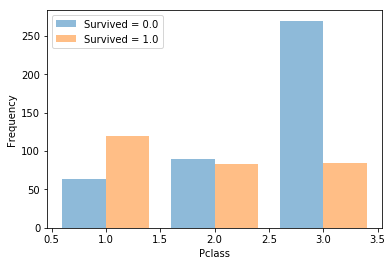

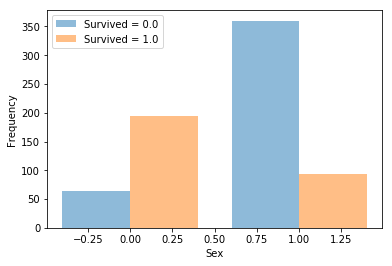

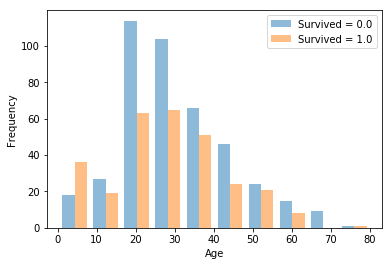

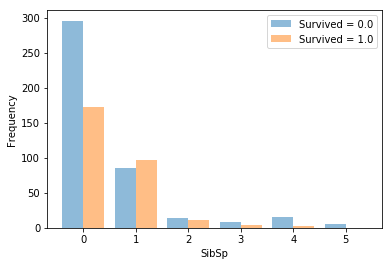

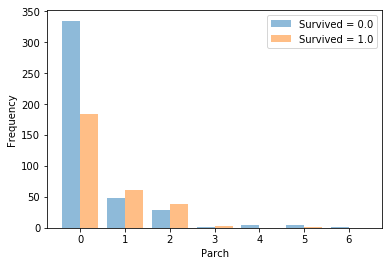

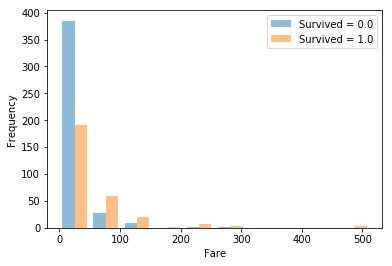

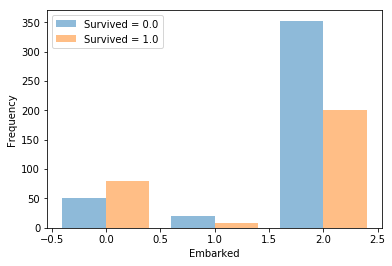

Classifying using Majority Vote...
	-- training error: 0.404
Classifying using Random...
	-- training error: 0.485
Classifying using Decision Tree...
	-- training error: 0.014
Investigating various classifiers...
Majority Vote Classifier
train_error: 0.403778558875
test_error: 0.407342657343
Random Classifier:
train_error: 0.489015817223
test_error: 0.486573426573
Decision Tree Classifier
train_error: 0.0115289982425
test_error: 0.240839160839
Investigating depths...
Investigating training set sizes...
Done


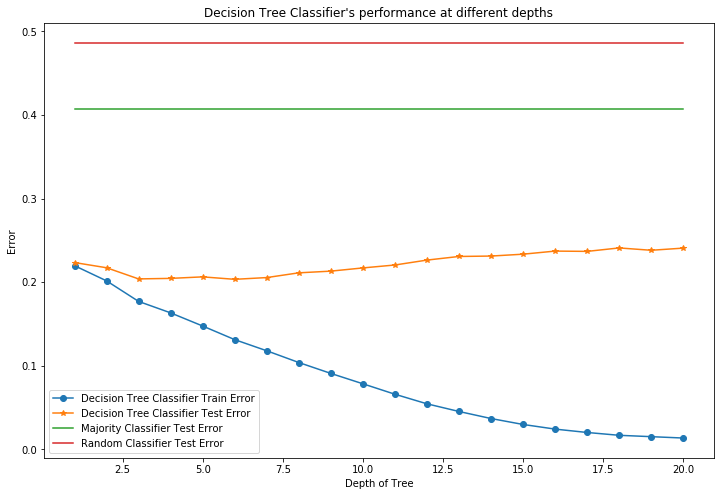

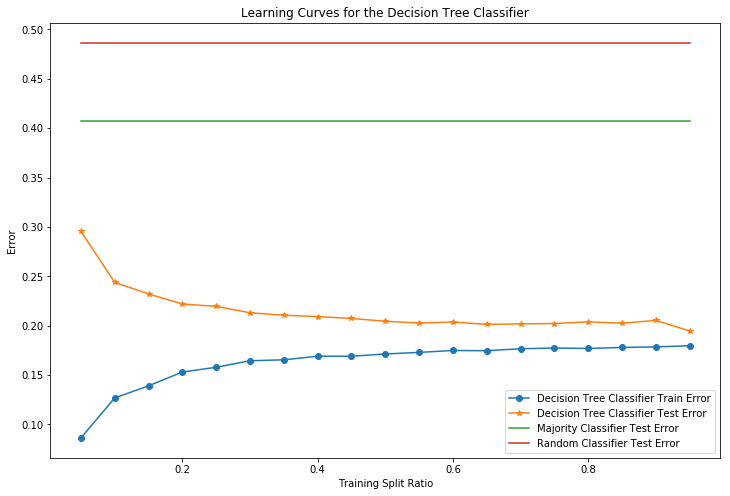

In [24]:

######################################################################
# main
######################################################################

def main():
    # load Titanic dataset
    titanic = load_data("titanic_train.csv", header=1, predict_col=0)
    X = titanic.X; Xnames = titanic.Xnames
    y = titanic.y; yname = titanic.yname
    n,d = X.shape  # n = number of examples, d =  number of features
    
    
    
    #========================================
    # part a: plot histograms of each feature
    print 'Plotting...'
    for i in xrange(d) :
        plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname)

       
    #========================================
    # train Majority Vote classifier on data
    print 'Classifying using Majority Vote...'
    clf = MajorityVoteClassifier() # create MajorityVote classifier, which includes all model parameters
    clf.fit(X, y)                  # fit training data using the classifier
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print '\t-- training error: %.3f' % train_error
    
    
    
    ### ========== TODO : START ========== ###
    # part b: evaluate training error of Random classifier
    print 'Classifying using Random...'
    clf = RandomClassifier()
    clf.fit(X, y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print '\t-- training error: %.3f' % train_error
    
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # part c: evaluate training error of Decision Tree classifier
    # use criterion of "entropy" for Information gain 
    print 'Classifying using Decision Tree...'
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(X, y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print '\t-- training error: %.3f' % train_error
    
    ### ========== TODO : END ========== ###
    
    
    
    # note: uncomment out the following lines to output the Decision Tree graph
    """
    # save the classifier -- requires GraphViz and pydot
    import StringIO, pydot
    from sklearn import tree
    dot_data = StringIO.StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=Xnames)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph.write_pdf("dtree.pdf") 
    """
    
    
    
    ### ========== TODO : START ========== ###
    # part d: use cross-validation to compute average training and test error of classifiers
    print 'Investigating various classifiers...'

    print 'Majority Vote Classifier'
    train_error, test_error = error(MajorityVoteClassifier(), X, y)
    print('train_error: {}'.format(train_error))
    print('test_error: {}'.format(test_error))

    print 'Random Classifier:'
    train_error, test_error = error(RandomClassifier(), X, y)
    print('train_error: {}'.format(train_error))
    print('test_error: {}'.format(test_error))

    print 'Decision Tree Classifier'
    train_error, test_error = error(DecisionTreeClassifier(criterion='entropy'), X, y)
    print('train_error: {}'.format(train_error))
    print('test_error: {}'.format(test_error))
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # part e: investigate decision tree classifier with various depths
    print 'Investigating depths...'
    
    _, majority_test_error = error(MajorityVoteClassifier(), X, y)
    _, random_test_error = error(RandomClassifier(), X, y)
    depths = np.arange(1, 21)
    training_errors, testing_errors = [], []
    
    for depth in depths:
        clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
        train_err, test_err = error(clf, X, y)
        training_errors.append(train_err)
        testing_errors.append(test_err)
        
    plt.figure(figsize=(12, 8))
    plt.plot(depths, training_errors, label='Decision Tree Classifier Train Error', marker='o')
    plt.plot(depths, testing_errors, label='Decision Tree Classifier Test Error', marker='*')
    plt.plot(depths, np.ones(20)*majority_test_error, label='Majority Classifier Test Error')
    plt.plot(depths, np.ones(20)*random_test_error, label='Random Classifier Test Error')
    plt.legend(loc='best')
    plt.title("Decision Tree Classifier's performance at different depths")
    plt.xlabel('Depth of Tree')
    plt.ylabel('Error')
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # part f: investigate decision tree classifier with various training set sizes
    print 'Investigating training set sizes...'
    
    splits = np.linspace(0.05, 0.95, 19)
    training_errors, testing_errors, majority_clf_errors, random_clf_errors = [], [], [], []
    
    for split in splits:
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
        training_error, testing_error = error(clf, X, y, test_size=split)
        training_errors.append(training_error)
        testing_errors.append(testing_error)
        
        _, majority_clf_error = error(MajorityVoteClassifier(), X, y)
        majority_clf_errors.append(majority_clf_error)
        
        _, random_clf_error = error(RandomClassifier(), X, y)
        random_clf_errors.append(random_clf_error)
        
    plt.figure(figsize=(12, 8))
    plt.plot(1-splits, training_errors, label='Decision Tree Classifier Train Error', marker='o')
    plt.plot(1-splits, testing_errors, label='Decision Tree Classifier Test Error', marker='*')
    plt.plot(1-splits, np.ones(19)*majority_test_error, label='Majority Classifier Test Error')
    plt.plot(1-splits, np.ones(19)*random_test_error, label='Random Classifier Test Error')
    plt.legend(loc='best')
    plt.title("Learning Curves for the Decision Tree Classifier")
    plt.xlabel('Training Split Ratio')
    plt.ylabel('Error')
    ### ========== TODO : END ========== ###
       
    print 'Done'


if __name__ == "__main__":
    main()